In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, roc_curve,auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Data Examine

In [13]:
# Import modules
import numpy as np
import pandas as pd
import os
import pandas_datareader as pdr

loan_data = pdr.get_data_tiingo('GOOG', api_key='27367f32aa7bf197a7be53c2922ac131b49ab018')
loan_data.head

# Print missing values
print(loan_data.isna().sum())
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['close'].describe())

close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64
100.0
100.0
count    1258.000000
mean      935.175787
std       236.413219
min       516.830000
25%       740.070000
50%       944.160000
75%      1126.592500
max      1518.270000
Name: close, dtype: float64


In [8]:
stats_loan = loan_data.describe()

In [9]:
stats_loan

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,935.175787,942.760298,926.911190,934.766818,1.684259e+06,935.175787,942.760298,926.911190,934.766818,1.684259e+06,0.0,1.0
std,236.413219,238.094795,234.266508,235.862930,8.339302e+05,236.413219,238.094795,234.266508,235.862930,8.339302e+05,0.0,0.0
min,516.830000,522.734000,515.180000,519.500000,3.475180e+05,516.830000,522.734000,515.180000,519.500000,3.475180e+05,0.0,1.0
25%,740.070000,744.992425,735.627750,739.370000,1.202552e+06,740.070000,744.992425,735.627750,739.370000,1.202552e+06,0.0,1.0
50%,944.160000,950.295000,935.390000,942.175000,1.472237e+06,944.160000,950.295000,935.390000,942.175000,1.472237e+06,0.0,1.0
75%,1126.592500,1135.820000,1116.667500,1126.662500,1.908054e+06,1126.592500,1135.820000,1116.667500,1126.662500,1.908054e+06,0.0,1.0
max,1518.270000,1529.630000,1508.110000,1514.480000,1.116494e+07,1518.270000,1529.630000,1508.110000,1514.480000,1.116494e+07,0.0,1.0


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, (GOOG, 2015-02-13 00:00:00+00:00) to (GOOG, 2020-02-12 00:00:00+00:00)
Data columns (total 12 columns):
close          1258 non-null float64
high           1258 non-null float64
low            1258 non-null float64
open           1258 non-null float64
volume         1258 non-null int64
adjClose       1258 non-null float64
adjHigh        1258 non-null float64
adjLow         1258 non-null float64
adjOpen        1258 non-null float64
adjVolume      1258 non-null int64
divCash        1258 non-null float64
splitFactor    1258 non-null float64
dtypes: float64(10), int64(2)
memory usage: 131.6+ KB


In [14]:
# Examine 'Credit Score' after
print(loan_data_filled['divCash'].describe())

count    1258.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: divCash, dtype: float64


## Data Visulization

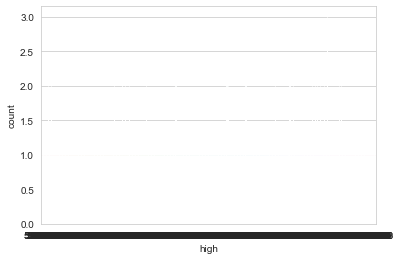

In [19]:
sns.countplot(loan_data_filled.high)

## Simple Imputer

In [15]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
close          1258 non-null float64
high           1258 non-null float64
low            1258 non-null float64
open           1258 non-null float64
volume         1258 non-null float64
adjClose       1258 non-null float64
adjHigh        1258 non-null float64
adjLow         1258 non-null float64
adjOpen        1258 non-null float64
adjVolume      1258 non-null float64
divCash        1258 non-null float64
splitFactor    1258 non-null float64
dtypes: float64(12)
memory usage: 118.1 KB
None


In [16]:
loans_imp_meanDF.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,935.175787,942.760298,926.911190,934.766818,1.684259e+06,935.175787,942.760298,926.911190,934.766818,1.684259e+06,0.0,1.0
std,236.413219,238.094795,234.266508,235.862930,8.339302e+05,236.413219,238.094795,234.266508,235.862930,8.339302e+05,0.0,0.0
min,516.830000,522.734000,515.180000,519.500000,3.475180e+05,516.830000,522.734000,515.180000,519.500000,3.475180e+05,0.0,1.0
25%,740.070000,744.992425,735.627750,739.370000,1.202552e+06,740.070000,744.992425,735.627750,739.370000,1.202552e+06,0.0,1.0
50%,944.160000,950.295000,935.390000,942.175000,1.472237e+06,944.160000,950.295000,935.390000,942.175000,1.472237e+06,0.0,1.0
75%,1126.592500,1135.820000,1116.667500,1126.662500,1.908054e+06,1126.592500,1135.820000,1116.667500,1126.662500,1.908054e+06,0.0,1.0
max,1518.270000,1529.630000,1508.110000,1514.480000,1.116494e+07,1518.270000,1529.630000,1508.110000,1514.480000,1.116494e+07,0.0,1.0


## Iterative imputation
In the previous exercise, you derived mean imputations for missing values of loan_data. However, in a machine learning interview, you will probably be asked about more dynamic imputation techniques that rely on other features in the dataset.

In this exercise, you'll practice a machine-learning based approach by imputing missing values as a function of remaining features using IterativeImputer() from sklearn.impute. This is a multivariate imputer that estimates each feature from all of the others in a 'round-robin' fashion.